In [285]:
import mne
import glob, os
import pickle
import numpy as np
import matplotlib.pyplot as plt

mne.viz.set_browser_backend("matplotlib")

'matplotlib'

In [286]:
# specify which recording to load
SUBJECT = "D"
SESSION = "Moth4"
BLOCK = "08"  # don't forget EmptyRoom

In [287]:
# stories in each session, in order
with open("/home/jerryjin/moth-meg-dataset/support_data/session_stories_dict.pkl", "rb") as f:
    session_stories_dict = pickle.load(f)
print(session_stories_dict)

# story to session and block mapping
with open("/home/jerryjin/moth-meg-dataset/support_data/story_sess_block.pkl", "rb") as f:
    story_sess_block = pickle.load(f)
print(story_sess_block)

# story to unique story mapping
with open("/home/jerryjin/moth-meg-dataset/support_data/story_to_uniquestory.pkl", "rb") as f:
    story_to_uniquestory = pickle.load(f)
print(story_to_uniquestory)

# the value in the stim channel that corresponds to the audio
with open("/home/jerryjin/moth-meg-dataset/support_data/stim_on_val.pkl", "rb") as f:
    STIM_ON_VAL = pickle.load(f)
print(STIM_ON_VAL)

# stimulus channel name and audio channel name, these need to be double checked each time
STIM_CH = "STI101"
AUDIO_CH = "MISC008"

{'Moth1': ['stimuli_auditory_localizer', 'alternateithicatom1', 'souls', 'wheretheressmoke1', 'avatar', 'legacy', 'odetostepfather', 'alternateithicatom2'], 'Moth2': ['undertheinfluence1', 'howtodraw', 'myfirstdaywiththeyankees', 'wheretheressmoke2', 'naked', 'life', 'undertheinfluence2'], 'Moth3': ['stagefright1', 'tildeath', 'wheretheressmoke3', 'fromboyhoodtofatherhood', 'sloth', 'exorcism', 'stagefright2'], 'Moth4': ['buck1', 'adollshouse', 'wheretheressmoke4', 'inamoment', 'theclosetthatateeverything', 'adventuresinsayingyes', 'haveyoumethimyet', 'buck2'], 'Moth5': ['swimmingwithastronauts1', 'thatthingonmyarm', 'eyespy', 'wheretheressmoke5', 'itsabox', 'hangtime', 'swimmingwithastronauts2']}
{'stimuli_auditory_localizer': ('Moth1', '01'), 'alternateithicatom1': ('Moth1', '02'), 'souls': ('Moth1', '03'), 'wheretheressmoke1': ('Moth1', '04'), 'avatar': ('Moth1', '05'), 'legacy': ('Moth1', '06'), 'odetostepfather': ('Moth1', '07'), 'alternateithicatom2': ('Moth1', '08'), 'underthein

## Load FIF File

In [288]:
loc_raw = f"/project_data/volume0/newmeg/{SESSION}/data/raw/{SUBJECT}/"
raw_file = glob.glob(loc_raw + f"{SUBJECT}_{SESSION}_{BLOCK}_raw.fif")[0]
raw = mne.io.read_raw_fif(raw_file)

Opening raw data file /project_data/volume0/newmeg/Moth4/data/raw/D/D_Moth4_08_raw.fif...


    Read a total of 13 projection items:
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
    Range : 14000 ... 711999 =     14.000 ...   711.999 secs
Ready.


In [289]:
raw.info

<Info | 26 non-empty values
 acq_pars: ACQactiveGround 1 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: EOG002, EOG003, ECG004, MEG0111, MEG0112, MEG0113, MEG0121, ...
 chs: 2 EOG, 1 ECG, 102 Magnetometers, 204 Gradiometers, 3 misc, 1 Stimulus, 1 System status channel information (Triux systems)
 custom_ref_applied: False
 description: TRIUX system at UPMC
 dev_head_t: MEG device -> head transform
 device_info: 4 items (dict)
 dig: 112 items (3 Cardinal, 5 HPI, 104 Extra)
 events: 1 item (list)
 experimenter: meguser (meguser)
 gantry_angle: 60.0
 helium_info: 2 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 3 items (dict)
 line_freq: 60.0
 lowpass: 330.0 Hz
 meas_date: 2024-12-02 21:30:01 UTC
 meas_id: 4 items (dict)
 nchan: 314
 proj_id: 1 item (ndarray)
 proj_name: language_semantic
 projs: generated with dossp-2.1: off, generated with dossp-2.1: off, ...
 sfreq: 1000.0 Hz
 subject_info: 6 items (dict)
 utc_offset: -05:00
>

In [290]:
raw_fixed = raw.copy()

## Inspect Stim and Audio Channel

In [291]:
# check the stim channel
stim_ch_data = raw.copy().pick([STIM_CH]).get_data()[0]
print(np.unique(stim_ch_data))

[ 0. 48.]


In [292]:
if BLOCK != "EmptyRoom":
    # get the should-be story name
    story_name = session_stories_dict[SESSION][int(BLOCK) - 1]
    print(story_name)

    # get the stim_on_value
    stim_on_val = STIM_ON_VAL[story_name]
    print(stim_on_val)
    assert stim_on_val in np.unique(stim_ch_data)
else:
    story_name = "EmptyRoom"

buck2
48.0


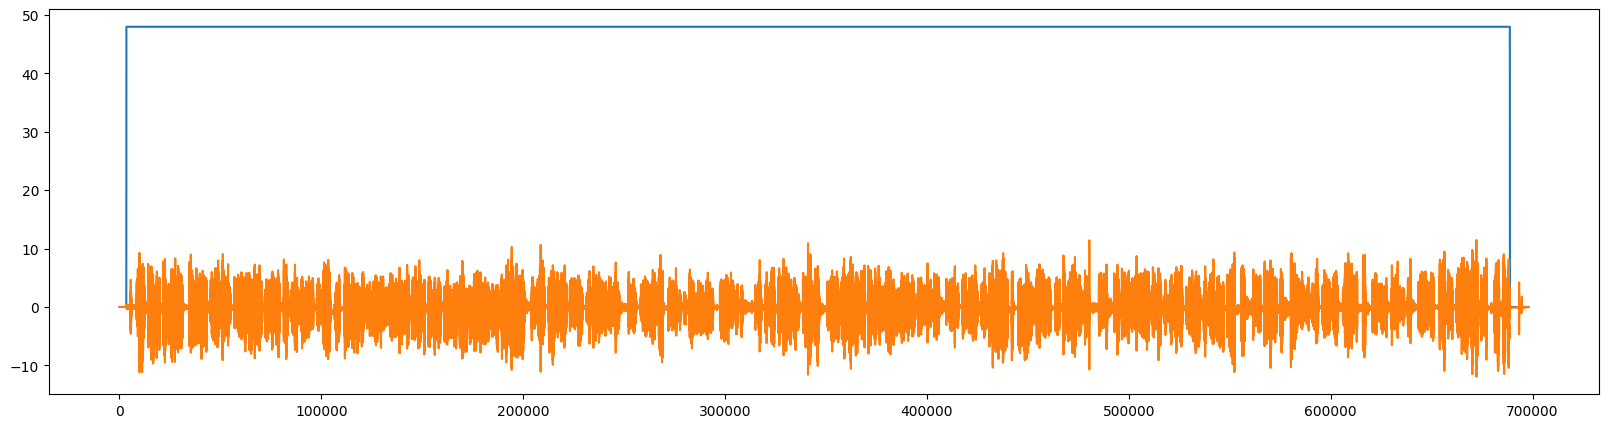

In [293]:
# get audio channel data
audio_ch_data = raw.copy().pick([AUDIO_CH]).get_data()[0]

# plot to check if the stim channel and audio channel are roughly aligned
plt.subplots(figsize=(20, 5))
plt.plot(stim_ch_data)
plt.plot(audio_ch_data)
plt.show()

### Fix Stim Channel for Specific Recordings

In [294]:
sfreq = raw.info["sfreq"]
fix_stim = False
if SUBJECT == "C" and story_name == "undertheinfluence1":  # Moth2-01
    stim_ch_data[: int(16 * sfreq)] = 0
    fix_stim = True
if SUBJECT == "C" and story_name == "alternateithicatom1":  # Moth1-02
    stim_ch_data[: int(4 * sfreq)] = 0
    fix_stim = True
if SUBJECT == "A" and SESSION == "Moth3":
    stim_ch_data[stim_ch_data > 0] += 10
    fix_stim = True

if fix_stim:
    print("Fixing stim channel!!!")
    # replace the stim channel
    raw_fixed = raw.copy().load_data().drop_channels([STIM_CH])
    info = mne.create_info(ch_names=[STIM_CH], ch_types=["stim"], sfreq=raw.info["sfreq"])
    info["dev_head_t"] = raw.info["dev_head_t"]
    raw_stim = mne.io.RawArray(stim_ch_data[np.newaxis, :], info)
    raw_fixed.add_channels([raw_stim], force_update_info=True)

    # get fixed audio channel data
    stim_ch_data_fixed = raw_fixed.copy().pick([STIM_CH]).get_data()[0]
    audio_ch_data_fixed = raw_fixed.copy().pick([AUDIO_CH]).get_data()[0]

    # plot to check if the stim channel and audio channel are roughly aligned
    plt.subplots(figsize=(20, 5))
    plt.plot(stim_ch_data_fixed)
    plt.plot(audio_ch_data_fixed)
    plt.show()

## Inspect ECG

In [295]:
scaling_dict_ecg = dict(mag=1e-12, ecg=2e-4)
start = 60
duration = 20
mag4ecg_chs = [
    "MEG1021",
    "MEG1031",
    "MEG0111",
    "MEG1211",
    "MEG1411",
    "MEG1421",
    "MEG0511",
    "MEG0521",
    "MEG0811",
    "MEG0911",
    "MEG0921",
    "MEG2531",
    "MEG2541",
]
ecg_chs = [ch for ch in raw.ch_names if "ECG" in ch]

Setting up band-pass filter from 5 - 35 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 5.00, 35.00 Hz: -6.02, -6.02 dB



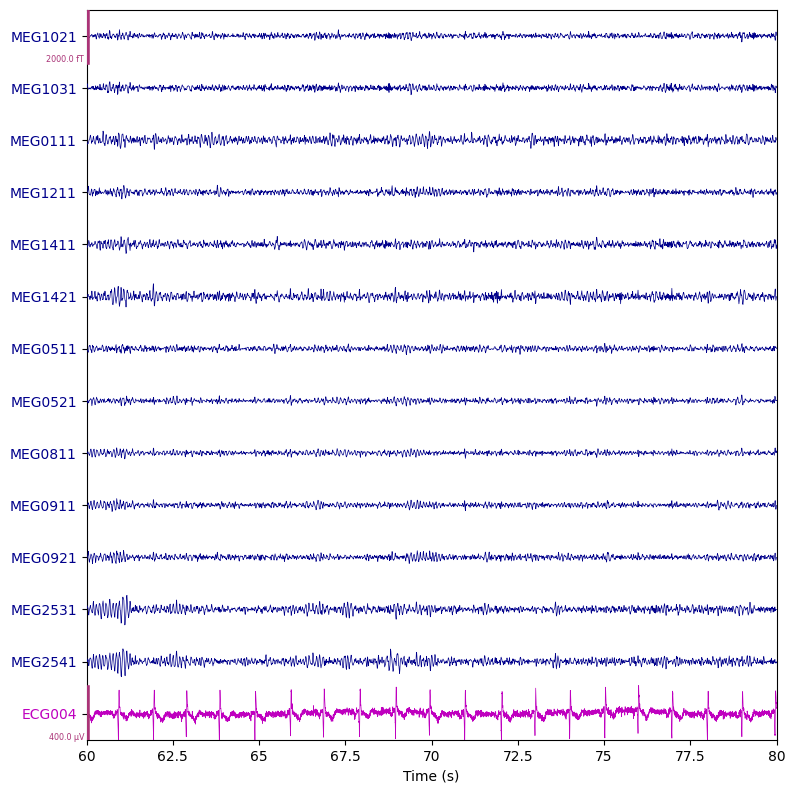

In [296]:
if len(ecg_chs) > 0:
    artifact_picks = mne.pick_channels(raw.ch_names, include=mag4ecg_chs + ecg_chs)
    raw.plot(
        order=artifact_picks,
        n_channels=len(artifact_picks),
        show_scrollbars=False,
        start=start,
        duration=duration,
        scalings=scaling_dict_ecg,
        highpass=5,
        lowpass=35,
    )
else:
    print("ECG channels not found.")

## Inspect EOG

In [297]:
scaling_dict_eog = dict(mag=1e-12, eog=2e-4)
start = 60
duration = 20
mag4eog_chs = [
    "MEG0121",
    "MEG0122",
    "MEG0123",
    "MEG0311",
    "MEG0312",
    "MEG0313",
    "MEG0511",
    "MEG0512",
    "MEG0513",
    "MEG0921",
    "MEG0922",
    "MEG0923",
    "MEG1211",
    "MEG1212",
    "MEG1213",
    "MEG1411",
    "MEG1412",
    "MEG1413",
]
eog_chs = [ch for ch in raw.ch_names if "EOG" in ch]

Setting up band-pass filter from 1 - 10 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 10.00 Hz: -6.02, -6.02 dB



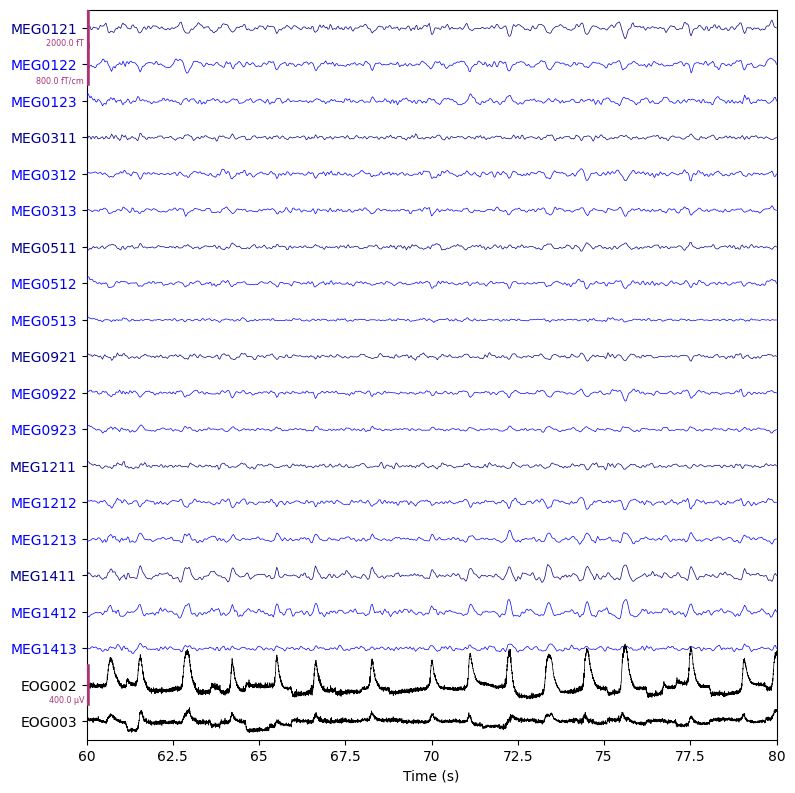

In [298]:
if len(eog_chs) > 0:
    artifact_picks = mne.pick_channels(raw.ch_names, include=mag4eog_chs + eog_chs)
    raw.plot(
        order=artifact_picks,
        n_channels=len(artifact_picks),
        show_scrollbars=False,
        start=start,
        duration=duration,
        scalings=scaling_dict_eog,
        highpass=1,
        lowpass=10,
    )
else:
    print("EOG channels not found.")

## Mark Bad Channels

In [299]:
# MEG1212 is bad for A and C
if SUBJECT in ["A", "C"]:
    raw_fixed.info["bads"] += ["MEG1212"]

In [300]:
# EOG001 is bad for C
if SUBJECT in ["C"]:
    raw_fixed.info["bads"] += ["EOG001"]

# EOG002 is bad for C in Moth2
if SUBJECT == "C" and SESSION == "Moth2":
    raw_fixed.info["bads"] += ["EOG002"]

# EOG001 is bad for D in Moth1
if SUBJECT == "D" and SESSION == "Moth1":
    raw_fixed.info["bads"] += ["EOG001"]

# EOG002, EOG003, ECG004 are bad for D in Moth3
if SUBJECT == "D" and SESSION == "Moth3":
    raw_fixed.info["bads"] += ["EOG002", "EOG003", "ECG004"]

In [301]:
raw_fixed.info

<Info | 26 non-empty values
 acq_pars: ACQactiveGround 1 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: EOG002, EOG003, ECG004, MEG0111, MEG0112, MEG0113, MEG0121, ...
 chs: 2 EOG, 1 ECG, 102 Magnetometers, 204 Gradiometers, 3 misc, 1 Stimulus, 1 System status channel information (Triux systems)
 custom_ref_applied: False
 description: TRIUX system at UPMC
 dev_head_t: MEG device -> head transform
 device_info: 4 items (dict)
 dig: 112 items (3 Cardinal, 5 HPI, 104 Extra)
 events: 1 item (list)
 experimenter: meguser (meguser)
 gantry_angle: 60.0
 helium_info: 2 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 3 items (dict)
 line_freq: 60.0
 lowpass: 330.0 Hz
 meas_date: 2024-12-02 21:30:01 UTC
 meas_id: 4 items (dict)
 nchan: 314
 proj_id: 1 item (ndarray)
 proj_name: language_semantic
 projs: generated with dossp-2.1: off, generated with dossp-2.1: off, ...
 sfreq: 1000.0 Hz
 subject_info: 6 items (dict)
 utc_offset: -05:00
>

## Save

In [302]:
LOC_SAVE = f"/project_data/volume0/jerryjin/moth_meg/{SESSION}/raw/{SUBJECT}/"
# make save directory if it doesn't exist
if not os.path.exists(LOC_SAVE):
    os.makedirs(LOC_SAVE)
raw_fixed.save(LOC_SAVE + f"{SUBJECT}_{SESSION}_{BLOCK}_raw.fif")

Writing /project_data/volume0/jerryjin/moth_meg/Moth4/raw/D/D_Moth4_08_raw.fif


Closing /project_data/volume0/jerryjin/moth_meg/Moth4/raw/D/D_Moth4_08_raw.fif
[done]
